### INSTRUCTION

You should have run `scripts/03_model.sh` to get the `velo.csv` file, and you may have run `scripts/04_velocity.Rmd` to check the validity of the velocity, so that the results of this scripts will not be too bad

You should set the predicted velocity file below

You should make sure the workspace is `scripts/`

You may set the following variable `mode` as 'real' or 'pred' to choose which velocity pseudo-time you want to compute

In [23]:
def change_into_current_py_path():
    import os
    current_dir = os.path.dirname(__file__)
    os.chdir(current_dir)

change_into_current_py_path()

#TODO:
velofile = "../test/model_test/normal_1/metrics/velo.csv"
mode = ['real', 'pred'][1]

### Get started

In [24]:
import scvelo as scv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [25]:
pt = pd.read_csv("../data/mESC/PseudoTime.csv", header=0, index_col=0)
pt = pt.sort_values(by='PseudoTime', ascending=True)
pt

,PseudoTime
RamDA_mESC_00h_F07,0.000000
RamDA_mESC_00h_F06,1.800718
RamDA_mESC_00h_D12,1.865533
RamDA_mESC_00h_D10,2.247476
RamDA_mESC_00h_C01,2.437594
...,...
RamDA_mESC_72h_D03,118.896310
RamDA_mESC_72h_G08,119.906270
RamDA_mESC_72h_E01,124.144545
RamDA_mESC_72h_B12,126.877338


In [26]:
ct = pd.read_csv("../data/mESC/celltype.csv", header=0, index_col=0)
ct = ct.loc[pt.index]
ct

,Type
RamDA_mESC_00h_F07,00h
RamDA_mESC_00h_F06,00h
RamDA_mESC_00h_D12,00h
RamDA_mESC_00h_D10,00h
RamDA_mESC_00h_C01,00h
...,...
RamDA_mESC_72h_D03,72h
RamDA_mESC_72h_G08,72h
RamDA_mESC_72h_E01,72h
RamDA_mESC_72h_B12,72h


In [27]:
pca = pd.read_csv("../data/mESC/pca30.csv", header=0, index_col=0)
pca = pca.loc[pt.index, :].values
pca

array([[-3.01833194e+01, -1.11981895e+01,  4.58542602e+00, ...,
        -8.69159816e-03,  4.09039263e-01,  1.99693112e+00],
       [-2.94627589e+01, -1.20625737e+01,  3.54969664e+00, ...,
        -9.45131060e-01, -3.48258813e-01,  1.64190887e+00],
       [-2.68757958e+01, -1.15802794e+01,  5.28740337e+00, ...,
         2.32294925e-02,  3.13315867e+00, -7.74006750e-01],
       ...,
       [ 2.55943310e+01, -1.21491677e+01,  1.45926638e+00, ...,
         1.93961715e+00,  1.17917344e+00,  3.93342937e-01],
       [ 2.40222634e+01, -1.37696397e+01,  3.59789948e+00, ...,
        -1.42303712e+00, -3.04809905e+00, -1.30519469e-01],
       [ 2.73814737e+01, -1.41090821e+01,  7.72335575e-01, ...,
        -3.90237317e-01,  1.31113867e+00, -5.99703344e-01]])

In [28]:
expr = pd.read_csv("../data/mESC/ExpressionData.csv", header=0, index_col=0)
expr = expr = expr.loc[:, pt.index]
_expr = expr.copy()
expr

,RamDA_mESC_00h_F07,RamDA_mESC_00h_F06,RamDA_mESC_00h_D12,RamDA_mESC_00h_D10,RamDA_mESC_00h_C01,RamDA_mESC_00h_A08,RamDA_mESC_00h_F11,RamDA_mESC_00h_B05,RamDA_mESC_00h_D04,RamDA_mESC_00h_G03,...,RamDA_mESC_72h_B11,RamDA_mESC_72h_F08,RamDA_mESC_72h_B02,RamDA_mESC_72h_C11,RamDA_mESC_72h_G04,RamDA_mESC_72h_D03,RamDA_mESC_72h_G08,RamDA_mESC_72h_E01,RamDA_mESC_72h_B12,RamDA_mESC_72h_D09
CITED1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.654412,2.008936,2.142425,0.316919,2.579829,2.319495,1.321177,0.461988,2.111848,0.188799
SLC2A3,6.429483,5.628284,5.208965,5.687905,4.953287,4.423215,5.662238,5.781222,5.376674,4.907349,...,6.152777,6.296774,6.328553,6.354653,5.355393,6.283729,5.506062,6.521109,6.303207,5.930656
MCM3,3.036066,3.298777,3.863850,3.333213,3.559622,3.494164,3.535018,2.889589,2.900174,3.235063,...,1.387757,2.652935,2.457440,1.888648,2.535687,1.723157,1.241374,1.134577,1.834004,2.138493
GM26387,0.000000,0.000000,0.765315,2.556367,1.207011,2.175635,1.245960,1.597131,0.000000,1.957619,...,1.176941,0.000000,1.338278,0.671073,1.435110,0.751110,0.788002,0.000000,1.384585,0.000000
SOCS2,3.381355,2.503450,2.932022,2.271648,1.958446,2.457667,1.262230,2.431641,1.495241,2.738352,...,1.149354,0.140277,0.279670,0.626827,0.914670,0.103323,0.110809,1.423634,1.150205,0.221119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DCXR,0.900593,0.423179,0.530517,0.536339,0.281808,0.128010,0.365362,0.216745,0.905801,0.251183,...,1.437018,1.494690,2.999659,0.572694,1.396296,1.088179,0.522269,2.545128,0.687463,0.000000
PDGFA,2.336599,2.084784,1.254348,1.528400,1.065591,1.264673,2.090605,2.011650,2.095280,2.167262,...,0.707922,0.245170,0.538734,0.189505,1.283975,0.015431,1.533787,0.215221,1.337032,1.623341
ELF3,0.403425,0.129024,0.917075,0.288475,0.067527,0.675945,0.900022,0.446361,0.477730,0.543662,...,1.975976,1.122256,1.588408,0.604084,2.157654,2.514330,3.448385,2.192864,2.176883,2.396312
TCOF1,2.180619,2.137624,2.352925,2.488075,2.188742,1.964231,2.286925,2.157694,1.672545,2.058559,...,0.713304,1.386568,1.216198,1.769528,1.312125,1.307994,0.985721,0.404124,0.968296,1.306094


In [29]:
in_len = out_len = 32

In [30]:
if mode == 'real':
    k, weights, nxts = 0.2, [1/3]*3, [2,8,32]

    expr = np.expm1(expr.values)
    n_cells = expr.shape[1]
    lst = expr[:, [-1]]
    expr = np.hstack((expr, np.tile(lst, (1, max(nxts))) ))
    velo = np.zeros((expr.shape[0], n_cells))
    for w,n in zip(weights, nxts):
        velo += (expr[:, n:n_cells+n] - expr[:, :n_cells])*w
    velo = velo*k
    velo = velo[:, in_len-1:-out_len]

elif mode == 'pred':
    velo = pd.read_csv(velofile, header=None).values.T[:, :-out_len]

In [31]:
_expr, pt, ct, pca = _expr.iloc[:, in_len-1:-out_len], pt.iloc[in_len-1:-out_len], ct[in_len-1:-out_len], pca[in_len-1:-out_len, :]

In [32]:
adata = scv.AnnData(X=_expr.values.T)
adata.obs_names = _expr.columns
adata.var_names = _expr.index

adata.obs.loc[:, 'celltype'] = ct.Type

adata.layers['spliced'] = np.expm1(adata.X)
adata.layers['unspliced'] = np.zeros_like(adata.X)
adata.layers['velocity'] = velo.T

adata.obsm['X_pca'] = pca

adata.uns['celltype_colors'] = ["#E41A1C", "#377EB8", "#4DAF4A", "#984EA3", "#FF7F00"]

adata

AnnData object with n_obs × n_vars = 357 × 1620
    obs: 'celltype'
    uns: 'celltype_colors'
    obsm: 'X_pca'
    layers: 'spliced', 'unspliced', 'velocity'

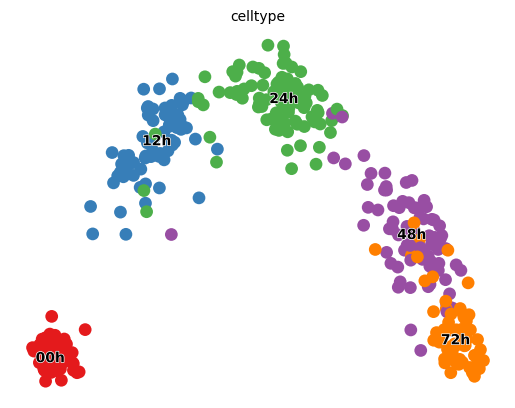

In [33]:
scv.pl.scatter(adata, color="celltype")

In [34]:
scv.pp.neighbors(adata, n_neighbors=30)

computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)


In [35]:
scv.pp.moments(adata)

Normalized count data: unspliced.
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [36]:
scv.tl.velocity_graph(adata)

computing velocity graph (using 1/32 cores)


  0%|          | 0/357 [00:00<?, ?cells/s]

    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


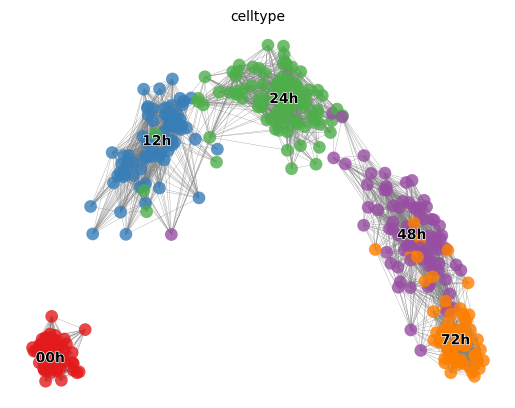

In [37]:
scv.pl.velocity_graph(adata, color="celltype", threshold=0.05)

In [38]:
scv.tl.velocity_pseudotime(adata)
adata

computing terminal states
    identified 0 region of root cells and 2 regions of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)


AnnData object with n_obs × n_vars = 357 × 1620
    obs: 'celltype', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime'
    uns: 'celltype_colors', 'neighbors', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_pca'
    layers: 'spliced', 'unspliced', 'velocity', 'Ms', 'Mu'
    obsp: 'distances', 'connectivities'

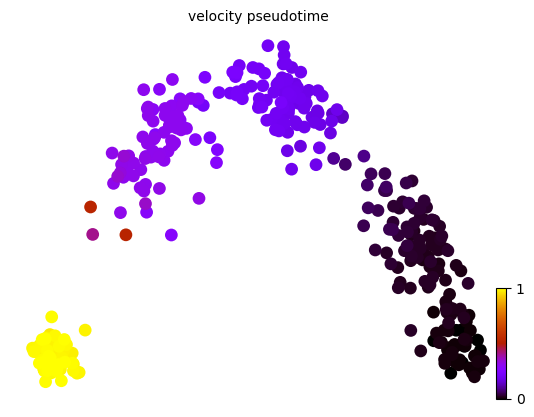

In [39]:
scv.pl.scatter(adata, color='velocity_pseudotime', cmap='gnuplot')

In [40]:
adata.obs['velocity_pseudotime'] = 1-adata.obs['velocity_pseudotime']

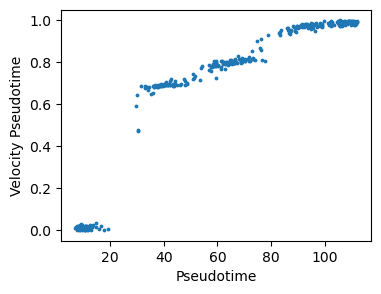

In [41]:
x, y = pt['PseudoTime'].sort_values().values, adata.obs['velocity_pseudotime'].values
plt.figure(figsize=(4,3))
plt.scatter(x, y, s=3)
plt.xlabel("Pseudotime")
plt.ylabel("Velocity Pseudotime")
plt.show()

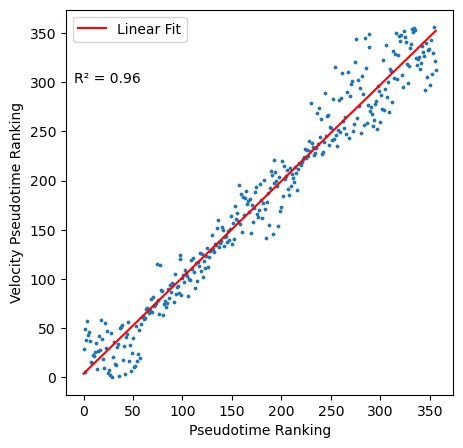

In [42]:
x, y = np.arange(len(y)), y.argsort()
fit = np.polyfit(x,y,1)
fit_x = np.linspace(min(x), max(x), 100)
fit_y = fit[0] * fit_x + fit[1]
r2 = r2_score(y, fit[0] * x + fit[1])

plt.figure(figsize=(5, 5))
plt.scatter(x, y, s=3)
plt.plot(fit_x, fit_y, color='red', label='Linear Fit')
plt.text(-10, 300, f'R² = {r2:.2f}', fontsize=10)
plt.legend()
plt.xlabel("Pseudotime Ranking")
plt.ylabel("Velocity Pseudotime Ranking")

if mode == 'real':
    plt.savefig("../fig/mESC/veloT_vs_T.png")

plt.show()

In [43]:
np.random.seed(0)
uni_pt = np.random.uniform(size=len(y))
uni_pt.sort()
uni_pt = uni_pt[y]

adata.obs['uni_velocity_pseudotime'] = pd.Series(uni_pt, index=adata.obs.index, name='uni_velocity_pseudotime')

saving figure to file ../fig/mESC/Predicted_Velocity_Pseudo-time.png


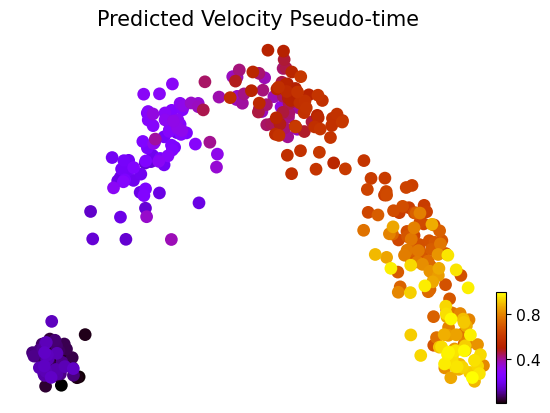

In [44]:
if mode == 'real':
    adata.obs['velocity_pseudotime'].to_csv("../data/mESC/velocity_pseudotime_real.csv")
    adata.obs['uni_velocity_pseudotime'].to_csv("../data/mESC/uni_velocity_pseudotime_real.csv")
    scv.pl.scatter(adata, color='uni_velocity_pseudotime', cmap='gnuplot', title="Real Velocity Pseudo-time", fontsize=15, save="../fig/mESC/Real_Velocity_Pseudo-time.png")

elif mode == 'pred':
    adata.obs['velocity_pseudotime'].to_csv("../data/mESC/velocity_pseudotime_pred.csv")
    adata.obs['uni_velocity_pseudotime'].to_csv("../data/mESC/uni_velocity_pseudotime_pred.csv")
    scv.pl.scatter(adata, color='uni_velocity_pseudotime', cmap='gnuplot', title="Predicted Velocity Pseudo-time", fontsize=15, save="../fig/mESC/Predicted_Velocity_Pseudo-time.png")

### NEXT

You may run `scripts/06_pt_hvg.Rmd`